In [ ]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Задачи проекта:**
- Изучить данные, провести предварительный анализ
- Ответить на следующие вопросы:
 - Что считать покупкой?
 - Сколько пользователей совершили покупку только один раз?
 - Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
 - В какой день недели товар чаще всего покупается (+ разбивка по товарам)?
 - Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

## Изучаем и подготавливаем данные

In [ ]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Na в некоторых столбцах, вероятно, означает, что не все заказы были подтверждены, отправлены или доставлены

In [ ]:
#меняем тип данных
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [ ]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [ ]:
#меняем тип данных
items.shipping_limit_date = pd.to_datetime(items.shipping_limit_date)

In [ ]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## **1. Сколько пользователей совершили покупку только один раз?**

За покупку будем считать оплаченный заказ, то есть заказ, у которого зафиксировано время оплаты (order_purchase_timestamp)

In [ ]:
#создаем отдельный датафрейм с оплаченными заказами
purchases = orders.query('order_purchase_timestamp != ""')
#объединяем полученный датафрейм с датафреймом с инфой о клиентах
customers_purchases = customers.merge(purchases, on = 'customer_id')

In [ ]:
customers_purchases.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [ ]:
one_purchase = customers_purchases.groupby('customer_unique_id', as_index = False) \
    .agg({'order_id' : 'count'}) \
    .query('order_id == 1')
one_purchase.customer_unique_id.nunique()

93099

93099 покупателей совершили покупку только один раз

## **2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?**

Предположим, что недоставленные заказы - это заказы, у которых отсутсвует дата доставки (order_delivered_customer_date). Отберем такие заказы и сгруппируем их по статусам

In [ ]:
#сгруппируем заказы по статусам
orders_without_delivery_date = orders.query('order_delivered_customer_date == ""') \
    .groupby('order_status', as_index = False) \
    .agg({'order_id' : 'count'})
orders_without_delivery_date

,order_status,order_id
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


created —  создан / approved —  подтверждён / invoiced —  выставлен счёт / processing —  в процессе сборки заказа / shipped —  отгружен со склада

Заказы с указанными выше статусами мы не будем рассматривать, поскольку эти заказы находятся в процессе обработки/доставки.

Рассмотрим более подробно следующие статусы:
delivered —  доставлен пользователю / unavailable —  недоступен / canceled —  отменён

Если отсутсвие даты доставки у заказов со статусами unavailable и canceled вполне логично, то ситуация, когда статус доставки delivered, но дата доставки отсутсвует, требует более тщательного рассмотрения.

In [ ]:
#отберем заказы со статусом delivered и без даты доставки
delivered_without_date = orders.query('order_delivered_customer_date == "" and order_status == "delivered"')
delivered_without_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


Изучив данные, можно предположить, что отстуствие даты доставки у данных заказов - технический сбой, поскольку подобных заказов не так много (8) + мы не заметили ничего необычного при рассмотрении данных.

Отберем данные с интересующими нас статусами (unavailable/canceled ) и посчитаем среднее количество недоставленных заказов в месяц

In [ ]:
not_delivered = orders.query('order_delivered_customer_date == "" and (order_status == "unavailable" or order_status == "canceled")')
#преобразуем обещанную дату доставки к началу месяца, чтобы далее группировать данные по месяцам
not_delivered.order_estimated_delivery_date = not_delivered.order_estimated_delivery_date.dt.strftime('%Y-%m')

In [ ]:
#разбивка по месяцам

not_delivered_per_months = not_delivered.groupby(['order_estimated_delivery_date', 'order_status'], as_index = False) \
    .agg({'order_id':'count'}) \
    .groupby(['order_estimated_delivery_date', 'order_status', ], as_index=False) \
    .agg({'order_id' : 'mean'}) \
    .rename(columns = {'order_id' : 'mean_orders'})

Text(0, 0.5, 'Среднее количество заказов')

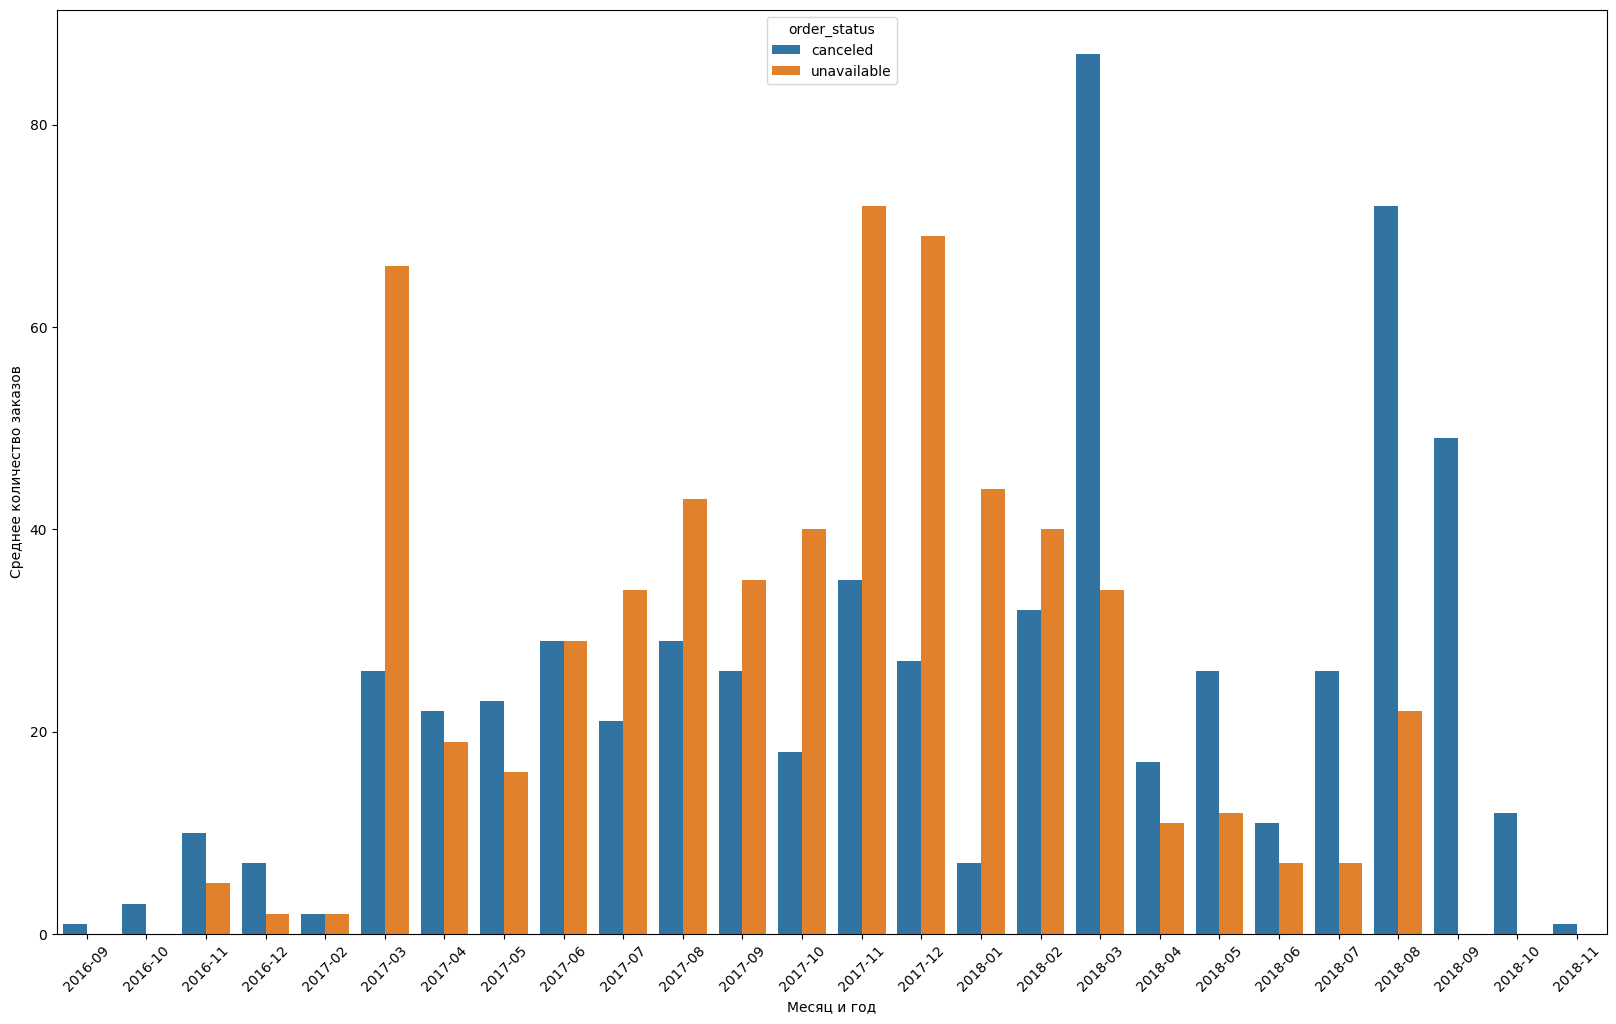

In [ ]:
#визуализация полученных данных
plt.figure(figsize = (20,12))
sns.barplot(data=not_delivered_per_months, x='order_estimated_delivery_date', y='mean_orders', hue='order_status')
plt.xticks(rotation=45)
plt.xlabel('Месяц и год')
plt.ylabel('Среднее количество заказов')

In [ ]:
#общие показатели
not_delivered_total = not_delivered.groupby(['order_estimated_delivery_date', 'order_status'], as_index = False) \
    .agg({'order_id':'count'}) \
    .groupby('order_status', as_index=False) \
    .agg({'order_id' : 'mean'}) \
    .rename(columns = {'order_id' : 'mean_orders'})
not_delivered_total

,order_status,mean_orders
0,canceled,23.807692
1,unavailable,29.000000


## **3. В какой день недели товар чаще всего покупается ( + разбивка по товарам)?**

In [ ]:
#посмотреть, сколько уникальных товаров и сколько раз покупали
items.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: product_id, Length: 32951, dtype: int64

In [ ]:
#объединим датафреймы покупок и товаров
products_per_weekday = items.merge(purchases, on = 'order_id')

In [ ]:
#создаем столбец с названием дня недели
products_per_weekday['weekday'] = products_per_weekday.order_purchase_timestamp.dt.strftime('%A')

In [ ]:
#создаем дф со днями недели и количеством заказов для каждого товара
weekdays = products_per_weekday.groupby(['product_id', 'weekday'], as_index = False) \
    .agg({'order_id' : 'count'}) \
    .rename(columns = ({'order_id' : 'orders_number'})) \
    .sort_values('orders_number', ascending = False)
weekdays.head()

,product_id,weekday,orders_number
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
41041,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
41046,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


In [ ]:
#создаем дф с максимальным кол-вом заказов для каждого товара
max_orders = weekdays.groupby('product_id', as_index = False) \
    .agg({'orders_number' : 'max'}) \
    .sort_values('orders_number', ascending = False)
max_orders

,product_id,orders_number
8613,422879e10f46682990de24d770e7f83d,93
19742,99a4788cb24856965c36a24e339b6058,92
22112,aca2eb7d00ea1a7b8ebd4e68314663af,89
10867,53b36df67ebb7c41585e8d54d6772e08,76
7079,368c6c730842d78016ad823897a372db,67
...,...,...
12761,62b07aff118f62756ee579afeedc3eb0,1
12760,62ae6a8f5789aec14529a277c7516def,1
12758,62abef05dddbd149514e4339c84f7d7d,1
12757,62a6991adbb1e60f5c03a77fae5568ff,1


In [ ]:
orders_per_weekday = max_orders.merge(weekdays, on = ['product_id', 'orders_number'])

In [ ]:
orders_per_weekday = orders_per_weekday.sort_values(['orders_number'], ascending = [False])
orders_per_weekday

,product_id,orders_number,weekday
0,422879e10f46682990de24d770e7f83d,93,Wednesday
1,99a4788cb24856965c36a24e339b6058,92,Monday
2,aca2eb7d00ea1a7b8ebd4e68314663af,89,Thursday
3,53b36df67ebb7c41585e8d54d6772e08,76,Tuesday
4,368c6c730842d78016ad823897a372db,67,Friday
...,...,...,...
21520,bb5719addb75c18148e1b6aa91e3793f,1,Saturday
21519,bb57d3e2c056ffaa1f31ee222dd81ee3,1,Tuesday
21518,bb580ac04bfbc59d40fdf59a5dfc2a8b,1,Wednesday
21517,bb58bcac750d6060319c4e89b560f7f1,1,Saturday


In [ ]:
orders_per_weekday.product_id.nunique()

32951

In [ ]:
orders_per_weekday.product_id.count()

42705

Как мы видим, общее количество product_id больше, чем количество уникальных product_id. Это обусловлено тем, что некоторые товары одинаково часто покупаются несколько раз в неделю.

In [ ]:
orders_per_weekday.product_id.value_counts()

9c31382f02ac001fe1a33a466471d98c    7
695c34c5771cca25ecdc04d24a9b49f6    6
b0075cdedc8e455d734e6b1875336ca1    6
cbb702235ad267cca951499fa8475606    6
e707c577789af56087a82650995ed3c8    6
                                   ..
7c252e2828f4198b4bcbdbe1bce858ea    1
7c1ed5098b2fe8445fa6a4853da78c21    1
7c1b31947e5d43e0a96efe80554c809d    1
7c1af6529d6dc15a19b722e39f20db2a    1
fffe9eeff12fcbd74a2f2b007dde0c58    1
Name: product_id, Length: 32951, dtype: int64

Выше представлена сводка по product_id.
Товар с ид 9c31382f02ac001fe1a33a466471d98c встречается в таблице 7 раз, то есть макс количество товаров одинаково каждый день недели.

In [ ]:
orders_per_weekday.query('product_id == "9c31382f02ac001fe1a33a466471d98c"')

,product_id,orders_number,weekday
14510,9c31382f02ac001fe1a33a466471d98c,1,Wednesday
14509,9c31382f02ac001fe1a33a466471d98c,1,Tuesday
14508,9c31382f02ac001fe1a33a466471d98c,1,Thursday
14507,9c31382f02ac001fe1a33a466471d98c,1,Sunday
14506,9c31382f02ac001fe1a33a466471d98c,1,Saturday
14505,9c31382f02ac001fe1a33a466471d98c,1,Monday
14504,9c31382f02ac001fe1a33a466471d98c,1,Friday


** Также нам стало интересно, в какой день недели покупают больше всего товаров :)


In [ ]:
orders_visualization = orders_per_weekday.groupby('weekday', as_index = False) \
    .agg({'orders_number' : 'sum'}) \
    .sort_values('orders_number', ascending = False)

In [ ]:
fig = px.bar(orders_visualization, x='weekday', y='orders_number')
fig.show()

На графике видно, что больше всего товаров покупают в начале недели, в концу недели количество покупок идет на спад

## **4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?**

Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [ ]:
#возьмем ранее созданный дф с покупками
customers_purchases.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [ ]:
#создаем столбец год-месяц
customers_purchases['year_month'] = customers_purchases.order_purchase_timestamp.dt.strftime('%Y-%m')

In [ ]:
#создаем столбец с количеством недель для дальнейшего расчета среднего кол-ва покупок в неделю
customers_purchases['n_of_weeks'] = customers_purchases.order_purchase_timestamp.dt.daysinmonth/7

In [ ]:
customers_purchases.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,n_of_weeks
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,4.428571


In [ ]:
#группируем данные, считаем кол-во заказов в месяц для каждого клиента
week_purchases = customers_purchases.groupby(['year_month', 'n_of_weeks', 'customer_unique_id'], as_index = False) \
    .agg({'order_id' : 'count'}) \
    .rename(columns = {'order_id' : 'orders_in_month'}) \
    .sort_values('orders_in_month', ascending = False)
week_purchases.head()

,year_month,n_of_weeks,customer_unique_id,orders_in_month
391,2017-01,4.428571,12f5d6e1cbf93dafd9dcc19095df0b3d,6
25766,2017-09,4.285714,b08fab27d47a1eb6deda07bfd965ad43,4
2176,2017-02,4.000000,a239b8e2fbce33780f1f1912e2ee5275,4
96629,2018-08,4.428571,c8460e4251689ba205045f3ea17884a1,4
5847,2017-04,4.285714,25a560b9a6006157838aab1bdbd68624,4


In [ ]:
#добавим столбец с кол-вом покупок в неделю для дальнейшего расчета среднего кол-ва покупок в неделю
week_purchases['orders_in_week'] = week_purchases.orders_in_month/ week_purchases.n_of_weeks

In [ ]:
#итоговая таблица
customers_purchases_per_week = week_purchases.groupby(['customer_unique_id','year_month'], as_index = False) \
    .agg({'orders_in_week' : 'mean'})
customers_purchases_per_week.head()

,customer_unique_id,year_month,orders_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333


Для проверки рассмотрим какой-нибудь customer_id, который делал заказы в разные месяцы.
Возьмем первый id, который совершал покупки в 10 разных меясцев

In [ ]:
customers_purchases_per_week.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    10
ca77025e7201e3b30c44b472ff346268     6
6469f99c1f9dfae7733b25662e7f1782     6
f0e310a6839dce9de1638e0fe5ab282a     6
63cfc61cee11cbe306bff5857d00bfe4     5
                                    ..
55e06703bd5d11ce8f8c2b7c5448425a     1
55e01c1272a2c7981d2b756431bfd7aa     1
55dfea89540867cbe96091b82db0cb06     1
55df93f592e064d6c3f456160d848d00     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [ ]:
customers_purchases_per_week.query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"')

,customer_unique_id,year_month,orders_in_week
54031,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05,0.225806
54032,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06,0.233333
54033,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,0.677419
54034,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08,0.225806
54035,8d50f5eadf50201ccdcedfb9e2ac8455,2017-09,0.233333
54036,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,0.451613
54037,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11,0.233333
54038,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,0.451613
54039,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07,0.451613
54040,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08,0.677419


In [ ]:
#дополнительно рассмотрим среднее количество покупок в неделю по месяцам без разбивки по пользователям
purchases_per_week = customers_purchases_per_week.groupby(['year_month'], as_index = False) \
    .agg({'orders_in_week' : 'mean'})

In [ ]:
#визуализируем
fig = px.line(purchases_per_week, x="year_month", y="orders_in_week", title='Динамика среднего количества покупок в неделю')
fig.show()

Как видим, в феврале 2017, феврале 2018 и сентябре 2018 наблюдаются скачки среднего количества покупок в неделю.